Setting up TPU for faster processing.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

print('Number of replicas:', tpu_strategy.num_replicas_in_sync)

Tensorflow version 2.8.0
Running on TPU  ['10.15.131.250:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.15.131.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.15.131.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


----

# Introduction 💡:
The aim of this project is to create a deep learning algorithum that is able to accurately characterize pneumonia via chest x-rays for pediatric patients.
The data set that is being used is coming from  Kaggle.com and is being utilized for this project.



# Process 🗒 : 

Workflows illustrating the process typically taken for creating a DL project.

<font color = blue> Data Preparation </font>

[![](https://mermaid.ink/img/pako:eNp9klFr2zAUhf_KRYWxgj1o0kJmSsGN49IRtrDCXuw83NjXtqgsGUmmS5P890m2N5a1THqR7j3nO-KiAytUSSxilVAvRYPaQi7BLdPvao1dA8k6TNBiuNHUja04-9J3e0sa1riDEDZ72ygJ8y2E4d3xse2Uo6z5TqPmZABlCRssnrEmc4T77OOk8FS43ek7eGxdDwxZc7kdI-49CpYHr3F1iI0h05K0J19PMnjirxTAEi3VyqcEA2lA_uCmR8Ff0XIltyNopC6HyyrLBt1Gq4KM4bLeTqmroZ9mX5VuUYwA-ADfybg0UBWUzueIn5zq-K3zbRRHeBh5cV_7F46xI5BkmctpnnYv6GyYUHEhootksUrSNDBWq2eKLubz-XQOX3hpm-i6-_k3IZ5sfwxXizS-np17Zuee5b-eNE4_Xy3-63l440lmN7Obdzx-s4C15IbGS_eVDp6TM9tQSzmL3LGkCnthc5bLk5P2nRskrUpulWZRhcJQwLC36mkvCxZZ3dNvUcLRfcN2Up1-ASci4ks)](https://mermaid.live/edit#pako:eNp9klFr2zAUhf_KRYWxgj1o0kJmSsGN49IRtrDCXuw83NjXtqgsGUmmS5P890m2N5a1THqR7j3nO-KiAytUSSxilVAvRYPaQi7BLdPvao1dA8k6TNBiuNHUja04-9J3e0sa1riDEDZ72ygJ8y2E4d3xse2Uo6z5TqPmZABlCRssnrEmc4T77OOk8FS43ek7eGxdDwxZc7kdI-49CpYHr3F1iI0h05K0J19PMnjirxTAEi3VyqcEA2lA_uCmR8Ff0XIltyNopC6HyyrLBt1Gq4KM4bLeTqmroZ9mX5VuUYwA-ADfybg0UBWUzueIn5zq-K3zbRRHeBh5cV_7F46xI5BkmctpnnYv6GyYUHEhootksUrSNDBWq2eKLubz-XQOX3hpm-i6-_k3IZ5sfwxXizS-np17Zuee5b-eNE4_Xy3-63l440lmN7Obdzx-s4C15IbGS_eVDp6TM9tQSzmL3LGkCnthc5bLk5P2nRskrUpulWZRhcJQwLC36mkvCxZZ3dNvUcLRfcN2Up1-ASci4ks)


<font color = blue> Neural Network Architecture  </font>

[![](https://mermaid.ink/img/pako:eNptktFPwjAQxv-Vpr6yGMUH3IPJ3JgQAY0-djzU9eYau3a21yAi_7tlDAPEPl2--353Xy7d0NIIoDGtlFmVNbdICk3Cc_7t3fK2JotFlNiylgglegv7bsIyjpy8ABfrJYmiO_KzAG-5IgvAlbEfJAMn3_UPuWePYLkjiq_BOpI8T5f7Efcdlm7mYb_ahjpjr_DpQaMMY6KIzDpi2efJgvRFxmyqW49kt3153MjZRAoB-jI1WoekIA78seuBPXnc8anizslKlhyl0cfj0i7WhKWmaaUC28uTjp-ypxZlI7_P9BmbGedOpDmbA1pZHlTQotD9aXGt4PyupJJKxRfZaJzl-cChNR8QXwyHw76OVlJgHd-0X8dDkh77A65GeXJzfcpcnzLpOZMn-e3V6F9mF7nQdEAbsA2XInyUTadTrKGBgsahFFBxr7Cghd4Gq28FRxgLicbSuOLKwYByj-Z1rUsao_VwMGWSh0_W9K7tL99Q1B4)](https://mermaid.live/edit#pako:eNptktFPwjAQxv-Vpr6yGMUH3IPJ3JgQAY0-djzU9eYau3a21yAi_7tlDAPEPl2--353Xy7d0NIIoDGtlFmVNbdICk3Cc_7t3fK2JotFlNiylgglegv7bsIyjpy8ABfrJYmiO_KzAG-5IgvAlbEfJAMn3_UPuWePYLkjiq_BOpI8T5f7Efcdlm7mYb_ahjpjr_DpQaMMY6KIzDpi2efJgvRFxmyqW49kt3153MjZRAoB-jI1WoekIA78seuBPXnc8anizslKlhyl0cfj0i7WhKWmaaUC28uTjp-ypxZlI7_P9BmbGedOpDmbA1pZHlTQotD9aXGt4PyupJJKxRfZaJzl-cChNR8QXwyHw76OVlJgHd-0X8dDkh77A65GeXJzfcpcnzLpOZMn-e3V6F9mF7nQdEAbsA2XInyUTadTrKGBgsahFFBxr7Cghd4Gq28FRxgLicbSuOLKwYByj-Z1rUsao_VwMGWSh0_W9K7tL99Q1B4)
<font color = blue> Fitting the Model </font>

[![](https://mermaid.ink/img/pako:eNp9kstuwjAQRX_FMluy4CXRLCoFkog-YAHdOVm48YRYJHbkTAQU-PcaCC1pq9qyNL5zz9gazYEmWgB1aZrrbZJxgyRSxK6qfl8bXmZkbvO5E0q86h5bQG14ThaAW202ZAlc7GPiOI9kwi5mYs3x-T5lK8C6jJuSU2vaEZ-9GS6VVGvic-TxfS5gQamTrGqJIZtwTDKykh_QJCbn547BDpIapVZHMmNLqOocm_zs8p0n9qqrqiU9szmgkUlbfWFvsrjVBiUi1fQA9zl8N4CkMs_djj8O_DDsVmj0BtzOYDBoYmcrBWbusNzd416DfQG9cegN-22m32amP5nQCx9643-Z2S_G74_6oz-Z6zlv2qUFmIJLYWfgcNEpZlBARF0bCki5bWtEI3Wy1roUHCEQErWhbsrzCrqU16hXe5VQF00NN5MvuZ2fonGdPgFLTMTT)](https://mermaid.live/edit#pako:eNp9kstuwjAQRX_FMluy4CXRLCoFkog-YAHdOVm48YRYJHbkTAQU-PcaCC1pq9qyNL5zz9gazYEmWgB1aZrrbZJxgyRSxK6qfl8bXmZkbvO5E0q86h5bQG14ThaAW202ZAlc7GPiOI9kwi5mYs3x-T5lK8C6jJuSU2vaEZ-9GS6VVGvic-TxfS5gQamTrGqJIZtwTDKykh_QJCbn547BDpIapVZHMmNLqOocm_zs8p0n9qqrqiU9szmgkUlbfWFvsrjVBiUi1fQA9zl8N4CkMs_djj8O_DDsVmj0BtzOYDBoYmcrBWbusNzd416DfQG9cegN-22m32amP5nQCx9643-Z2S_G74_6oz-Z6zlv2qUFmIJLYWfgcNEpZlBARF0bCki5bWtEI3Wy1roUHCEQErWhbsrzCrqU16hXe5VQF00NN5MvuZ2fonGdPgFLTMTT)



<font color = blue> Model Predictions and Evaluation </font>

[![](https://mermaid.ink/img/pako:eNp1kc1ugzAQhF_Fcq5wSMiB-lCJ8HOrVInegINrL8WqwcgsStIo714TaBVaxZas9cx8q5V9ocJIoIzW2hxFwy2SsiNuDeP7h-V9Q16cr_1XC1IJVKYbZj8qbkZFfP-ZHOYLeYMBq0mIixxw7KulWexSJ5IUk08Sjry619Mi7Y1ohpWYFQeOoiG5-oLFgE7OxTIhnjX8H4_USmu2ScI0yTJvQGs-gW2CIFhq_6gkNmzfn-7bRAv2C2zDLNrv1sxuzcR_mSzKnrbhA2Y6y27a1KMt2JYr6d79ctMpNtBCSZkrJdR81FjSsru66NhLjpBKhcZSVnM9gEf5iCY_d4IytCP8hBLF3Z-1S-r6DaXhmeI)](https://mermaid.live/edit#pako:eNp1kc1ugzAQhF_Fcq5wSMiB-lCJ8HOrVInegINrL8WqwcgsStIo714TaBVaxZas9cx8q5V9ocJIoIzW2hxFwy2SsiNuDeP7h-V9Q16cr_1XC1IJVKYbZj8qbkZFfP-ZHOYLeYMBq0mIixxw7KulWexSJ5IUk08Sjry619Mi7Y1ohpWYFQeOoiG5-oLFgE7OxTIhnjX8H4_USmu2ScI0yTJvQGs-gW2CIFhq_6gkNmzfn-7bRAv2C2zDLNrv1sxuzcR_mSzKnrbhA2Y6y27a1KMt2JYr6d79ctMpNtBCSZkrJdR81FjSsru66NhLjpBKhcZSVnM9gEf5iCY_d4IytCP8hBLF3Z-1S-r6DaXhmeI)

[![](https://mermaid.ink/img/pako:eNptkUlvgzAQhf-K5VzhUEikyIdKRIDokkvbG-Tg4KFYNRh5aRIl-e81Sxfa2rI0fu991mh8xqVkgAmuhDyUNVUGFS1yS9v9q6JdjbbOF37yToWlhst2tKN80HfI92_RZryg79BuTG16-5IcobS9ekFZ_gTaCjP52YDf5Y9S65l0n2_BKF7O1Yf8hTcwSdCyYmpGm5OAP42iigtBFvE6idPU00bJNyCLMAyn2j9wZmqy7I4_X4km7Au4WafRMpgzwZzJfjNpHKyC1b_MePqNPdyAaihnbvznQcemhgYKTFzJoKJuUgUu2quL2o5RAwnjRipMKio0eJhaI59PbYmJURY-QzGn7uuaKXX9ALscnZk)](https://mermaid.live/edit#pako:eNptkUlvgzAQhf-K5VzhUEikyIdKRIDokkvbG-Tg4KFYNRh5aRIl-e81Sxfa2rI0fu991mh8xqVkgAmuhDyUNVUGFS1yS9v9q6JdjbbOF37yToWlhst2tKN80HfI92_RZryg79BuTG16-5IcobS9ekFZ_gTaCjP52YDf5Y9S65l0n2_BKF7O1Yf8hTcwSdCyYmpGm5OAP42iigtBFvE6idPU00bJNyCLMAyn2j9wZmqy7I4_X4km7Au4WafRMpgzwZzJfjNpHKyC1b_MePqNPdyAaihnbvznQcemhgYKTFzJoKJuUgUu2quL2o5RAwnjRipMKio0eJhaI59PbYmJURY-QzGn7uuaKXX9ALscnZk)





----

In [2]:
!pip install colorama
!pip install opendatasets

In [3]:
import numpy as np
import pandas as pd
import re
import os
import opendatasets as od
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import colorama


# Execution 👨‍💻


In [4]:
#Importing data set kaggle API for inital data reivew
dataset = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mdespinoza
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:12<00:00, 200MB/s]


## Data Review 

In this section we will perform an assesment of the dataset without manipulating any of the data. 

After importing the data we will need to go through and identify the following: 

> - How many data sets are we given? 
> - How many classes are there in the dataset?

In [5]:
data_dir = './chest-xray-pneumonia'
os.listdir(data_dir)

['chest_xray']

In [6]:
# Identifying the number folders 
os.listdir('./chest-xray-pneumonia/chest_xray')


['val', 'train', 'test', '__MACOSX', 'chest_xray']

In [7]:
# Identifying the categories 
os.listdir('./chest-xray-pneumonia/chest_xray/test')

['NORMAL', 'PNEUMONIA']

In [8]:
CATEGORIES = ["PNEUMONIA", "NORMAL"]

# Identify the number of images per folder
test_set = ('./chest-xray-pneumonia/chest_xray/test')
train_set = ('./chest-xray-pneumonia/chest_xray/train')
val_set = ('./chest-xray-pneumonia/chest_xray/val')

In [9]:
# function to calculate the number of images in a dataset folder
def count_xray_images(title, dataset, color):
    print(color + title)
    pneumonia = len(os.listdir(os.path.join(dataset, 'PNEUMONIA')))
    normal = len(os.listdir(os.path.join(dataset, 'NORMAL')))
    print(f"Pnuemonia = {pneumonia}")
    print(f"Percent Pnuemonia = {pneumonia/(pneumonia + normal)*100:.1f}%")
    print(f"Normal = {normal}")
    print(f"Percent Normal = {normal/(pneumonia + normal)*100:.1f}%")
    print(f"TOTAL = {pneumonia + normal}")


# function to create a bargraph for the number of images per category in any dataset folder  
def data_visual(title, dataset, y_limit):
    pneumonia = len(os.listdir(os.path.join(dataset, 'PNEUMONIA')))
    normal = len(os.listdir(os.path.join(dataset, 'NORMAL')))
    x_pos = CATEGORIES
    y = (normal, pneumonia)
    plt.title(title)
    # define color for bars
    c = ("#FF0000", "#ADD8E6")
    # Adding labels, and the title
    plt.xlabel("Category")
    plt.ylabel("Num. of X-Ray Images")
    plt.bar(x_pos, y, color = c, ec = "black")
    plt.ylim(y_limit)

    for i in range(len(x_pos)): 
        plt.text(i, y[i], y[i], ha="center", va="bottom")

    plt.show()

Test Folder
Pnuemonia = 390
Percent Pnuemonia = 62.5%
Normal = 234
Percent Normal = 37.5%
TOTAL = 624


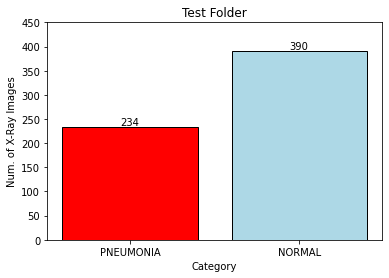

Train Folder
Pnuemonia = 3875
Percent Pnuemonia = 74.3%
Normal = 1341
Percent Normal = 25.7%
TOTAL = 5216


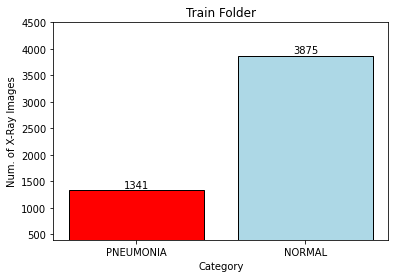

Val Folder
Pnuemonia = 8
Percent Pnuemonia = 50.0%
Normal = 8
Percent Normal = 50.0%
TOTAL = 16


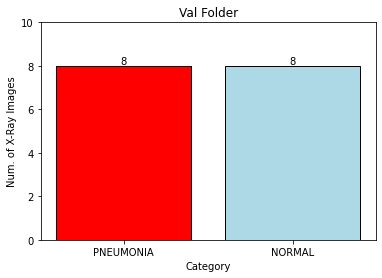

In [10]:
# Calling the function to provide the calculations for each folder and visualization
count_xray_images("Test Folder", test_set, colorama.Fore.BLUE)
data_visual("Test Folder", test_set,[0, 450])
count_xray_images("Train Folder", train_set, colorama.Fore.GREEN)
data_visual("Train Folder", train_set,[400, 4500])
count_xray_images("Val Folder", val_set, colorama.Fore.RED)
data_visual("Val Folder", val_set,[0, 10])

In [11]:
# function to display images
def image_xray_batch(path1, path2, title):
    image_list = os.listdir(path1)
    image = path2

    plt.figure(figsize=(5,5))

    for i in range(16): 
        plt.subplot(4, 4, i + 1)
        img = plt.imread(os.path.join(image, image_list[i]))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(title)
    plt.tight_layout()

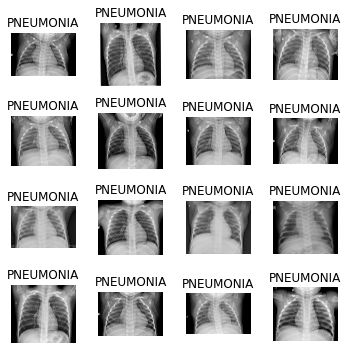

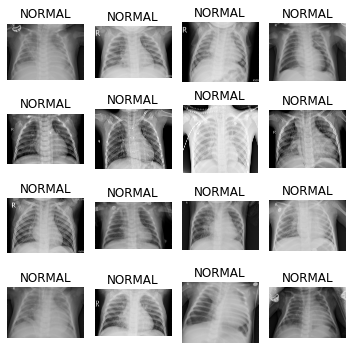

In [12]:
image_xray_batch(
'./chest-xray-pneumonia/chest_xray/train/NORMAL',
'./chest-xray-pneumonia/chest_xray/train/NORMAL',
    "PNEUMONIA")

image_xray_batch(
    './chest-xray-pneumonia/chest_xray/train/PNEUMONIA', 
    './chest-xray-pneumonia/chest_xray/train/PNEUMONIA',
    "NORMAL")


The max px value = 255.0 and the min = 0.0


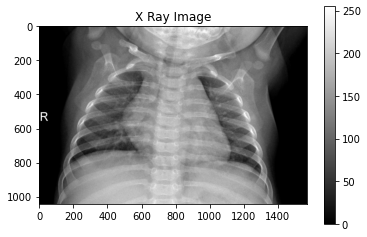

In [13]:
norm_img = os.listdir("./chest-xray-pneumonia/chest_xray/train/NORMAL")[0]
norm_dir = "./chest-xray-pneumonia/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(norm_dir, norm_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('X Ray Image')

print(f"The max px value = {sample_img.max():.1f} and the min = {sample_img.min():.1f}")

<b> Data Review Summary: </b>

The scope of this project is based on a classification problem that is to asses and predict if a Pediatric patient has pnuemonia or not (2 Categories = Pneumoina, Normal). However in reviewing the training data it is evident that the observations for "Normal" (majority class), is significantly higher than the "Pneumonia" (minority class) observations. Which implies that the dataset is imbalanced and will need to be corrected in the data preparation to avoid any bias towards the "Normal" class. 

The process to balanace the data between both classes would be to adjust the weights of each class. 

Also, the validation data is very small n=16 and not sufficent for creating a model that we could trust. Thus in the next section we will also split the training and validation data using a standard split of 80:20 to create a larger validation dataset  

-----

## Data Preparation 🔢

In [14]:
#accessing the data via googlecloudstorage - which allows for the utliizaiton of Google's TPU 

GCS_PATH = 'gs://kds-7d8d6352305c640b4084285616169079853d84b5df55d6be0bc51958'

In [15]:
# paths defined to variables
test_image_folder = (GCS_PATH + '/chest_xray/test/*/*')
train_set_folder = (GCS_PATH + '/chest_xray/train/*/*')
val_set_folder = (GCS_PATH + '/chest_xray/val/*/*')


In [16]:
# Split our trianing dataset into a training and validaiton set via "train_test_split" by a split of 8:2. 
train_files = tf.io.gfile.glob(str(train_set_folder))
train_files.extend(tf.io.gfile.glob(str(val_set_folder)))

training, validation = train_test_split(train_files, test_size=0.2)

In [17]:
# Verification of (n) of train dataset in each category folder created after the split.
normal_n = len([train_files for train_files in training if "NORMAL" in train_files])
print("Normal images: " + str(normal_n))

pneu_n = len([train_files for train_files in training if "PNEUMONIA" in train_files])
print("PNEUMONIA images: " + str(pneu_n))

Normal images: 1063
PNEUMONIA images: 3122


In [18]:
# creating slices from our defined dataset arrays

# training
data_struc_train = tf.data.Dataset.from_tensor_slices(training)
# validation
data_struc_val = tf.data.Dataset.from_tensor_slices(validation)
# test
test_data_struc  = tf.data.Dataset.list_files(str(test_image_folder))

In [19]:
# train data 
train_count = tf.data.experimental.cardinality(data_struc_train).numpy()
print("Training (80%) = " + str(train_count))
# val data
val_count = tf.data.experimental.cardinality(data_struc_val).numpy()
print("Validating (20%) = " + str(val_count))
# test data
test_count = tf.data.experimental.cardinality(test_data_struc).numpy()
print("Test = " + str(test_count ))

Training (80%) = 4185
Validating (20%) = 1047
Test = 624


In [20]:
# defining data labels as an array 
categories_labels = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                              for item in tf.io.gfile.glob(str(GCS_PATH + '/chest_xray/train/*'))])

In [21]:
categories_labels

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [22]:
# Setting dataset to be labeled with categories(0)|(1)
def define_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"

In [23]:
# defining image size constant 
IMAGE_SIZE = [180, 180]

# Establish unfiormity with the images (3D Tensor) and scaling them down 
# to smaller sizes. 
def img_conversion(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, IMAGE_SIZE)

In [24]:
def path(file_path):
    label = define_label(file_path)
    img = tf.io.read_file(file_path)
    img = img_conversion(img)
    return img, label

In [25]:
autotune = tf.data.experimental.AUTOTUNE

BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync

train_data_st = data_struc_train.map(path, num_parallel_calls=autotune)

val_data_st = data_struc_train.map(path, num_parallel_calls=autotune)

test_data_st = test_data_struc.map(path, num_parallel_calls=autotune)

test_data_st = test_data_st.batch(BATCH_SIZE)


In [26]:
# verify data normalization = image shape and label  
for image, label in train_data_st.take(1): 
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


In [27]:
def prep_data_pre_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the 
    # background while the model is training.
    ds = ds.prefetch(buffer_size=autotune)

    return ds

In [28]:
train_data_st = prep_data_pre_training(train_data_st)
val_data_st = prep_data_pre_training(val_data_st)

image_batch, label_batch = next(iter(train_data_st))

In [29]:
# Adjusting the weights for both classes to compensate for the 
# data not being equal
weight_for_0 = (1 / normal_n)*(train_count)/2.0 
weight_for_1 = (1 / pneu_n)*(train_count)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Normal Weight: {:.2f}'.format(weight_for_0))
print('Pneumonia Weight: {:.2f}'.format(weight_for_1))

Normal Weight: 1.97
Pneumonia Weight: 0.67


---

## Neural Network Architecture ⛓

In [30]:
def build_model():
    # The model is going to consist of a sequence of layers as 
    # noted by tf.keras.Squential
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)), # expected input shape 
        
        # Conv2D = convolution layer 
        # setting filters (16) and kernel size (3)
        # padding defined as 'same' which implies the preservation 
        # of spatial dminensions
        # with activation Rectified Linear Unit = 0 or greater is the ouput
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),  
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        # Maxpool2D - pooling of max values
        tf.keras.layers.MaxPool2D(),
        
        tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()]), 

        tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()]), 

        tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()]), 
        
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()]), 
        
        # prevents over fitting the model
        tf.keras.layers.Dropout(0.2),

        # reshape the input 
        tf.keras.layers.Flatten(),

        tf.keras.Sequential([
        # Dense implies adding a layer of neurons 
        tf.keras.layers.Dense(512, activation='relu'),
        # normalizing the data
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.7)]),

        tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5)]),

        tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3)]),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [31]:
# Distribute training across the TPU 
with tpu_strategy.scope(): 
    model = build_model()
    # defining metrics to be as outputs in the neural network
    METRICS = ['accuracy', # fration of predictions the model gets correct
        # measure what proportion of "+" id's were correct
        tf.keras.metrics.Precision(name='precision'),
        # measure what prportion of actual positives weere id correctly 
        tf.keras.metrics.Recall(name='recall')]

    #setting up compiler 
    model.compile(
         # Applying gradient descent algorithm
        optimizer='adam',
        # cross entropy loss for binary (0 or 1 ) 
        # classifications = NORMAL or PNEUMONA  
        loss='binary_crossentropy', 
        metrics=METRICS)

## Fitting the Model 🛠

In [32]:
EPOCHS = 15

#initial - 1st model fit training
history = model.fit(
    train_data_st,
    steps_per_epoch= train_count // BATCH_SIZE, # num of sample / batch size 
    epochs=EPOCHS,
    validation_data=val_data_st,
    validation_steps= val_count // BATCH_SIZE, # num of sample / batch size 
    class_weight=class_weight, # data imbalance correction by weights 
)

Epoch 1/15
32/32 [==============================] - 145s 3s/step - loss: 0.5094 - accuracy: 0.7363 - precision: 0.9334 - recall: 0.6965 - val_loss: 0.5918 - val_accuracy: 0.7559 - val_precision: 0.7559 - val_recall: 1.0000
Epoch 2/15
32/32 [==============================] - 45s 1s/step - loss: 0.3118 - accuracy: 0.8652 - precision: 0.9707 - recall: 0.8450 - val_loss: 0.5826 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 3/15
32/32 [==============================] - 46s 1s/step - loss: 0.2411 - accuracy: 0.9043 - precision: 0.9777 - recall: 0.8916 - val_loss: 0.6369 - val_accuracy: 0.7324 - val_precision: 0.7324 - val_recall: 1.0000
Epoch 4/15
32/32 [==============================] - 46s 1s/step - loss: 0.2158 - accuracy: 0.9163 - precision: 0.9759 - recall: 0.9107 - val_loss: 0.6622 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000
Epoch 5/15
32/32 [==============================] - 46s 1s/step - loss: 0.1961 - accuracy: 0.9294 - precision: 

In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 45, 45, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 22, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 11, 128)       27072     
                                                      

In [34]:
# Save keras model so that model may be used later to continue training the data
# from the saved state.
checkp_cb = tf.keras.callbacks.ModelCheckpoint("pneumonia_model.h5", 
                                               save_best_only=True)

# training will terminate if loss does not improve after "5" epochs
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

In [35]:
# defining learning rate decay to be applied accross the 2nd model fit training 
# until local  minima is obtained
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [36]:
#second - 2nd model fit training
history = model.fit(
    train_data_st,
    steps_per_epoch= train_count // BATCH_SIZE,
    # increased batch size as callbacks has been added to stop training after
    # defined criteria has been achieved. 
    epochs= 100,
    validation_data=val_data_st,
    validation_steps= val_count // BATCH_SIZE,
    class_weight=class_weight,
    callbacks=[checkp_cb, early_stop_cb, lr_scheduler]
)

Epoch 1/100
32/32 [==============================] - 51s 2s/step - loss: 0.2618 - accuracy: 0.8999 - precision: 0.9652 - recall: 0.8982 - val_loss: 61.7348 - val_accuracy: 0.2607 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0100
Epoch 2/100
32/32 [==============================] - 49s 2s/step - loss: 0.2102 - accuracy: 0.9170 - precision: 0.9719 - recall: 0.9155 - val_loss: 123.5897 - val_accuracy: 0.2627 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0089
Epoch 3/100
32/32 [==============================] - 49s 2s/step - loss: 0.1995 - accuracy: 0.9175 - precision: 0.9769 - recall: 0.9111 - val_loss: 130.2797 - val_accuracy: 0.2646 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0079
Epoch 4/100
32/32 [==============================] - 51s 2s/step - loss: 0.2140 - accuracy: 0.9146 - precision: 0.9713 - recall: 0.9120 - val_loss: 21.7520 - val_accuracy: 0.2656 - val_precision: 1.0000 - val_recall: 0.0027 - lr: 0.0071
Epoch 5/100
32/32 [=======

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 45, 45, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 22, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 11, 128)       27072     
                                                      

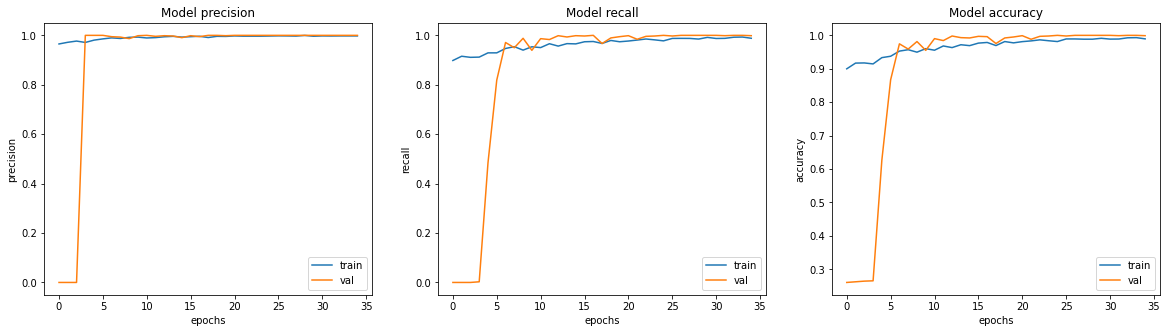

In [38]:
# plotting training results
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy',]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## Model Predictions ⏰

In [39]:
loss, acc, prec, rec = model.evaluate(test_data_st)

5/5 [==============================] - 20s 4s/step - loss: 1.0036 - accuracy: 0.8029 - precision: 0.7633 - recall: 0.9923


Summary  📈



1. The model overall has an 98.95% accuracy and a loss of 3.55%. 
  - model may be improved by adjusting the CNN (Fine-tunning)

2. The model predicition accuracy is 80.29% which is less than both the training and validation accuracy. (Can be improved!) 

3. The model prediction Recall is larger than the precision. Precision may be imrpoved by adding more data that is of high quality. 
  - 76.33 % of total class outcomes was predicted correctly

4. To improve the results there are two options: 
  - Fine-tunning of the CNN and re-training it. 
  - Capture more data



---





---



# Sources 📝

Acknowledgements Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Kaggle Project: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Other Kaggle opensource review on dataset: 
1. https://www.kaggle.com/code/aakashnain/beating-everything-with-depthwise-convolution
2.  https://www.kaggle.com/code/amyjang/tensorflow-pneumonia-classification-on-x-rays 
3. https://towardsdatascience.com/deep-learning-for-detecting-pneumonia-from-x-ray-images-fc9a3d9fdba8
4. https://towardsdatascience.com/detecting-covid-19-induced-pneumonia-from-chest-x-rays-with-transfer-learning-an-implementation-311484e6afc1


Colab TPU Use With Flowes modeling: https://colab.research.google.com/notebooks/tpu.ipynb#scrollTo=LtAVr-4CP1rp

Webiste: https://colab.research.google.com/notebooks/snippets/accessing_files.ipynb#scrollTo=z1_FuDjAozF1

